<a href="https://colab.research.google.com/github/PraneelUJ/CS203_Lab_6/blob/main/CS203_Lab_6_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Task1: Implement a Multi-Layer Perceptron (MLP) Using the Iris Dataset
- Load the Iris dataset using sklearn.datasets.load_iris.
- Extract features and labels, ensuring labels are one-hot encoded.
- Split the dataset into training (80%) and testing (20%) sets.
- Normalize feature values to [0,1] using standard scaling.


In [1]:
!pip install wandb

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [3]:
iris = load_iris(as_frame=True)

In [4]:
iris

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [5]:
X=iris.data
y=iris.target

In [6]:
y=y.to_numpy().reshape(-1, 1)

In [7]:
y.shape

(150, 1)

In [8]:
encoder=OneHotEncoder(sparse_output=False)
y_encoded=encoder.fit_transform(y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=45, stratify=y,shuffle=True)



In [10]:
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Task 2: Define and Train the MLP Model
- Construct a Multi-Layer Perceptron (MLP) model with the following architecture:
- Input layer: 4 neurons (for 4 features).
- Hidden layer: 16 neurons, ReLU activation.
- Output layer: 3 neurons (for each class), softmax activation.
- Train using:
- Loss function: Categorical cross-entropy.
- Optimizer: Adam.
- Learning rate: 0.001.
- Batch size: 32.
- Epochs: 50.

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [12]:
model=Sequential([Dense(16,activation="relu",input_shape=(4,)),
                  Dense(3,activation='softmax')])

model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

model_history=model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.125)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 374ms/step - accuracy: 0.5574 - loss: 1.2412 - val_accuracy: 0.8000 - val_loss: 0.9387
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.5452 - loss: 1.1960 - val_accuracy: 0.8000 - val_loss: 0.9209
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.6053 - loss: 1.1329 - val_accuracy: 0.7333 - val_loss: 0.9038
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5956 - loss: 1.1382 - val_accuracy: 0.7333 - val_loss: 0.8872
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.5910 - loss: 1.1022 - val_accuracy: 0.8000 - val_loss: 0.8706
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.6160 - loss: 1.0792 - val_accuracy: 0.8000 - val_loss: 0.8541
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.6660 - loss: 1.0437 - val_accuracy: 0.8000 - val_loss: 0.8377
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.6531 - loss: 1.0282 - val_accuracy: 0.8000 - val_loss: 0.8218

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 395 (1.55 KB)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 264 (1.04 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.7667 - loss: 0.5185
The test accuracy is 0.7667
Training Losses:
 [1.22425163 1.18932199 1.15495193 1.12439334 1.09333956 1.06420255
 1.03422689 1.00727963 0.97900385 0.95308089 0.92805773 0.90336001
 0.880126   0.8579731  0.83577824 0.81553197 0.79459977 0.77549183
 0.75785553 0.73953545 0.72285187 0.70562923 0.69010526 0.67398828
 0.65906525 0.64487666 0.63162369 0.61817896 0.60567778 0.59345043
 0.5817228  0.57047981 0.55937356 0.54924983 0.53925395 0.52961695
 0.52060437 0.51186317 0.5036158  0.49592951 0.48807263 0.48067126
 0.47325256 0.4664613  0.45981926 0.45322338 0.44716334 0.44118991
 0.43548125 0.42976511]
Validation Losses:
 [0.93870604 0.92091113 0.90378869 0.88715106 0.87058032 0.85411441
 0.83774787 0.82176185 0.80599648 0.79072988 0.77540851 0.76015431
 0.74499154 0.72973669 0.71436405 0.69905639 0.68413746 0.66892403
 0.65430444 0.6397863  0.62575269 0.61235785 0.59946263 0.58678353
 0.57436377 0.56265557 0.55124974 

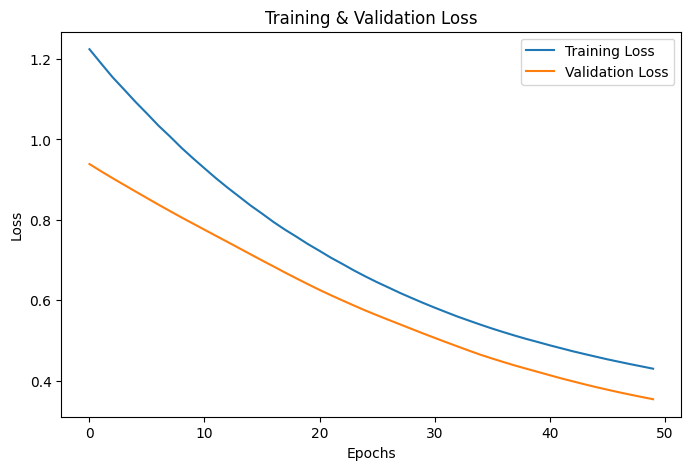

In [13]:
test_loss,test_accuracy=model.evaluate(X_test,y_test)
print(f"The test accuracy is {test_accuracy:.4f}" )

array_training_losses=np.array(model_history.history['loss'])
array_validation_losses=np.array(model_history.history['val_loss'])

print("Training Losses:\n", array_training_losses)
print("Validation Losses:\n", array_validation_losses)

# Plot training & validation loss
plt.figure(figsize=(8, 5))
plt.plot(array_training_losses, label='Training Loss')
plt.plot(array_validation_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()

In [14]:
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Accuracy: 0.7667
Precision: 0.7766
Recall: 0.7667
F1-score: 0.7613


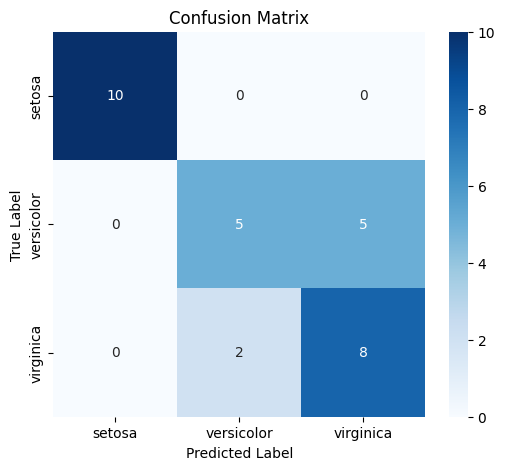

In [15]:
y_prob=model.predict(X_test)

y_pred_label=model.predict(X_test)

y_pred=np.argmax(y_pred_label,axis=1)

y_true=np.argmax(y_test,axis=1)

accuracy=accuracy_score(y_true,y_pred)
precision=precision_score(y_true,y_pred,average="weighted")
recall=recall_score(y_true,y_pred,average="weighted")
f1=f1_score(y_true,y_pred,average="weighted")
confusion=confusion_matrix(y_true,y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, cmap="Blues", fmt="d",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [16]:
import wandb

In [18]:
wandb.init(project="Lab6")

wandb.config.update({
    "learning_rate": 0.001,
    "batch_size": 32,
    "epochs": 50,
    "architecture": "MLP",
    "hidden_layer_neurons": 16,
    "activation_hidden": "relu",
    "activation_output": "softmax",
    "optimizer": "Adam",
    "loss_function": "categorical_crossentropy"
})

plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, cmap="Blues", fmt="d",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

wandb.log({"confusion_matrix": wandb.Image(plt)})
plt.close()

wandb.log({
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1_score": f1
})

plt.figure(figsize=(8, 5))
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Log Loss Curve to W&B
wandb.log({"loss_curve": wandb.Image(plt)})
plt.close()

for epoch, (train_loss, val_loss) in enumerate(zip(model_history.history['loss'], model_history.history['val_loss'])):
    wandb.log({
        "epoch": epoch + 1,
        "training_loss": train_loss,
        "validation_loss": val_loss
    })


### Loss Curves

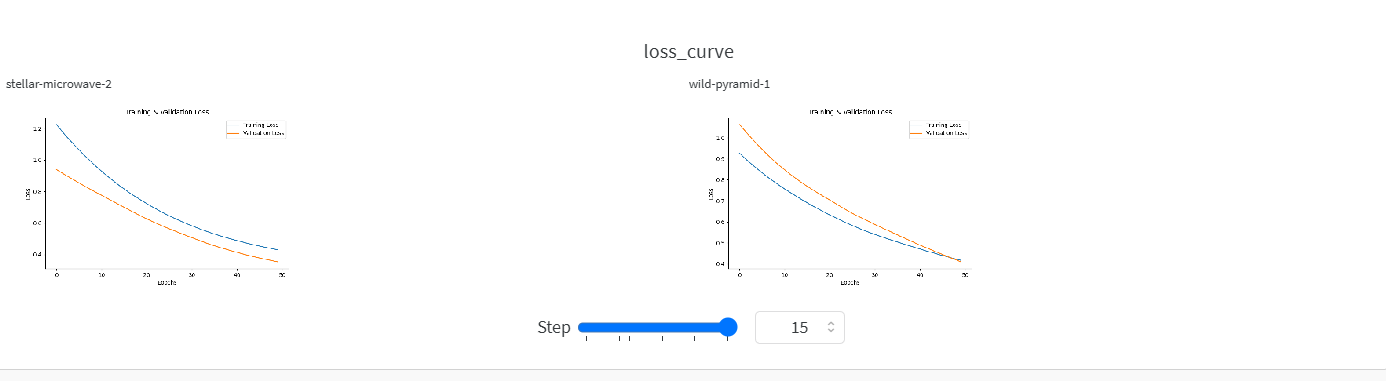

### Confusion Matrix logged in WandB

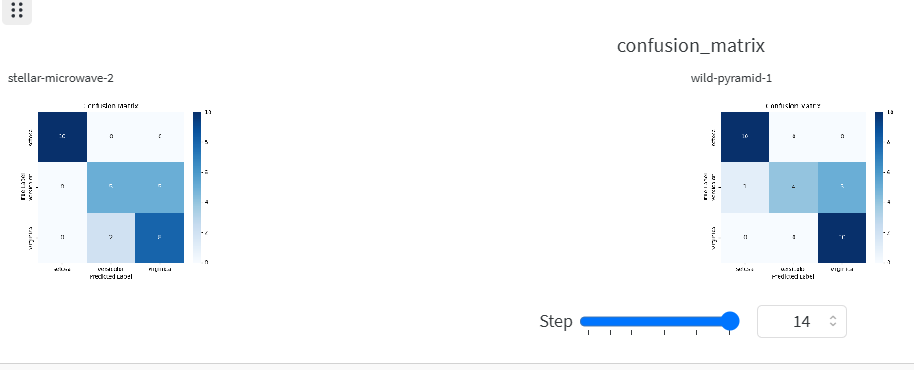

### Epochs, Validation Loss and Training Loss in WandB

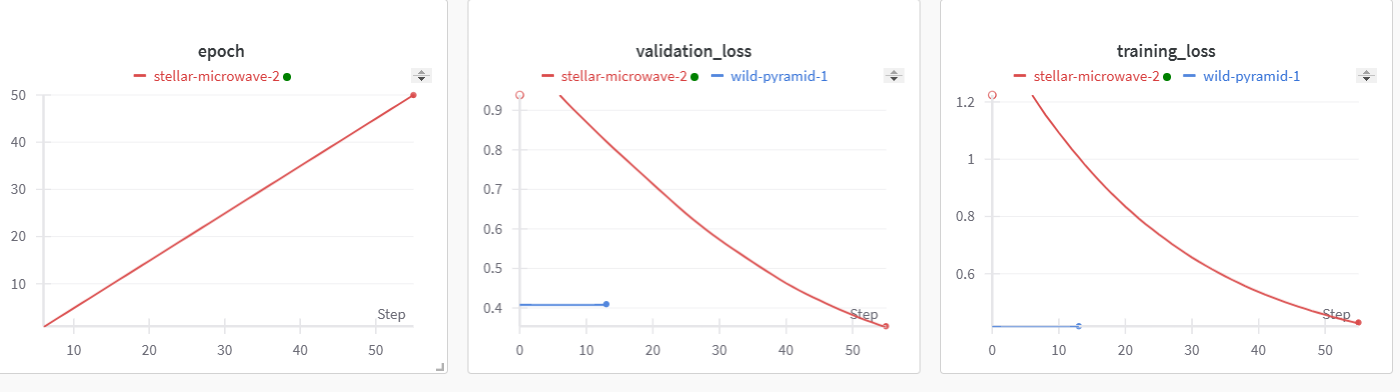

### Precision and Recall in WanB

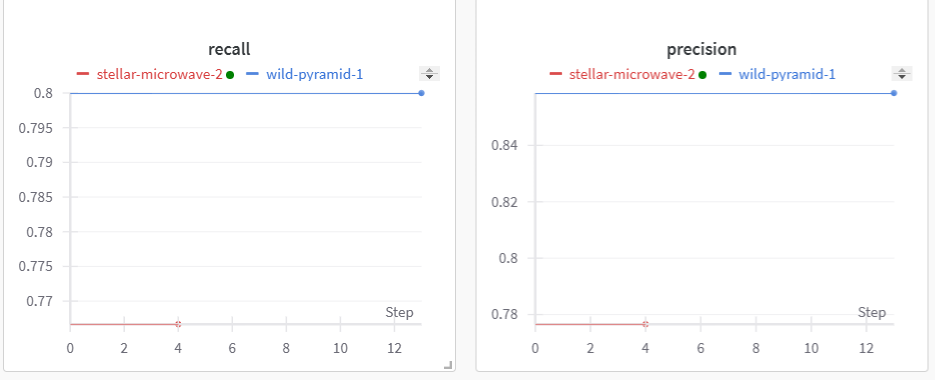

### Accuracy


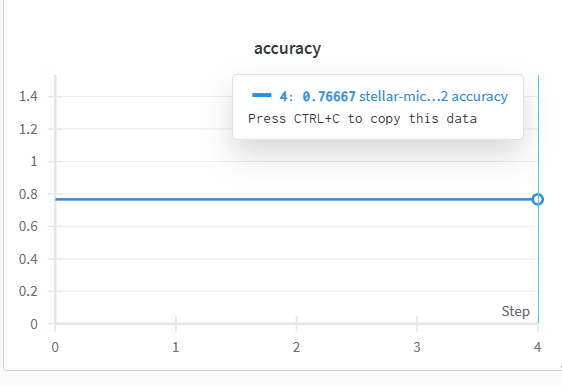

### F1 Score

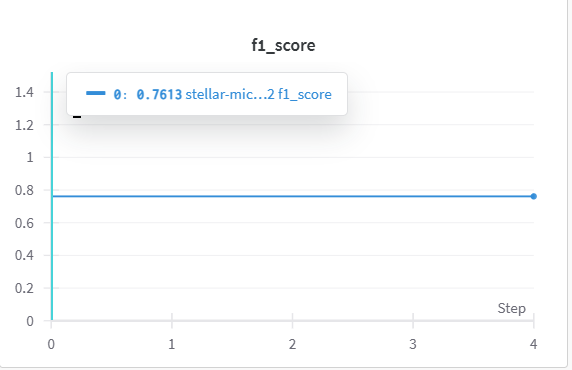

In [20]:
print(f"Dashboard URL: {wandb.run.url}")

Dashboard URL: https://wandb.ai/23110254-indian-institute-of-technology-gandhinagar/Lab6/runs/m0k276it
